# PROJET INTELLIGENCE ARTICIFIELLE

Réalisé par Margaux Dupré, Laila Maud Delamart et Aïcha Souaré

Date de réalisation : 11 mai 2025

## Objectif du projet
Ce projet a pour objectif de développer un modèle prédictif qui permettra l'**estimation de la survie des patients atteints de cancer du poumon**.
 Pour ce faire, plusieurs approches d'apprentissage automatique seront explorées, notamment :
*   La régression
*   Les machines à vecteurs de support (SVM)
*   Les perceptrons multicouches (MLP)

Notre jeu de données est le suivant : https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer?resource=download

## Plan de travail  
1. Prétraitement et analyse exploratoire
2. Modélisation prédictive
3. Validation et interprétation


# 1. Prétraitement et Analyse Exploratoire

Cette étape est nécessaire et va permettre d'effectuer un nettoyage des données, gérer les valeurs manquantes et mener une analyse statistique descriptive afin de mieux comprendre la distribution et les caractéristiques des variables de notre jeu de données.

In [1]:
# On commence par les importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# On va importer notre jeu de données sous format CSV
df = pd.read_csv("/content/survey_lung_cancer.csv")

# On affiche un aperçu de notre dataframe
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
# Détermination de la forme de notre dataframe
df.shape

(309, 16)

Nous pouvons constater que notre dataframe comporte 309 lignes (observations) et 16 colonnes de variables (en excluant la première colonne des index)

In [5]:
# Affichage du nom des 16 colonnes
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
# Détection des valeurs manquantes par colonne
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


On constate qu'il n'y a aucune valeur manquante dans notre jeu de données.

In [8]:
# Affichage de toutes les valeurs possibles pour chaque colonne
for col in df.columns:
  print(col, df[col].unique())

GENDER ['M' 'F']
AGE [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING [1 2]
YELLOW_FINGERS [2 1]
ANXIETY [2 1]
PEER_PRESSURE [1 2]
CHRONIC DISEASE [1 2]
FATIGUE  [2 1]
ALLERGY  [1 2]
WHEEZING [2 1]
ALCOHOL CONSUMING [2 1]
COUGHING [2 1]
SHORTNESS OF BREATH [2 1]
SWALLOWING DIFFICULTY [2 1]
CHEST PAIN [2 1]
LUNG_CANCER ['YES' 'NO']


Notre dataframe ne contient pas de valeur incohérente

In [9]:
# Affichage de la répartition des valeurs possibles pour chaque colonne
for col in df.columns:
  print(col, df[col].value_counts())

GENDER GENDER
M    162
F    147
Name: count, dtype: int64
AGE AGE
64    20
56    19
63    19
62    18
60    17
61    16
59    15
70    15
58    13
67    13
55    11
69    11
72    10
71    10
57     9
68     9
77     9
54     8
51     8
65     7
74     6
75     5
52     4
47     4
73     4
66     4
53     4
76     4
49     3
48     2
44     2
81     2
78     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
SMOKING SMOKING
2    174
1    135
Name: count, dtype: int64
YELLOW_FINGERS YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64
ANXIETY ANXIETY
1    155
2    154
Name: count, dtype: int64
PEER_PRESSURE PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64
CHRONIC DISEASE CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64
FATIGUE  FATIGUE 
2    208
1    101
Name: count, dtype: int64
ALLERGY  ALLERGY 
2    172
1    137
Name: count, dtype: int64
WHEEZING WHEEZING
2    172
1    137
Name: count, dtype: int64
ALCOHOL CONSUMING ALCOHOL CON

Nous avons examiné la répartion des différentes valeurs pour chaque colonne.
Pour les 13 variables prenant pour valeur 1 ou 2, la règle est la suivante selon la page Kaggle :
* NO = 1
* YES = 2

Maintenant, nous allons passer à l'analyse statistique. L'objectif est d'explorer la distribution des variables présentes dans notre jeu de données, afin d'identifier les tendances générales, les éventuelles anomalies, ainsi que les relations potentielles entre les variables.

Pour ce faire nous allons produire une matrice de corrélation.


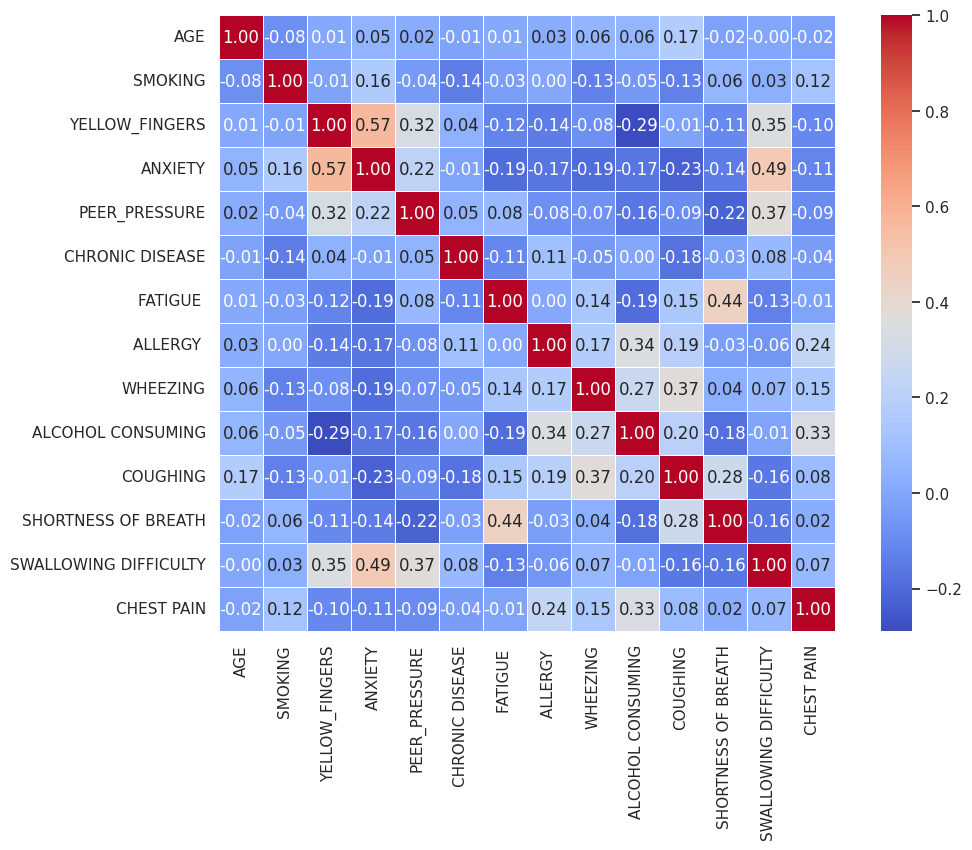

In [48]:
# Affichage d'une matrice de corrélation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr,             # Nom de notre matrice de corrélation
            annot=True,       # Afficher les valeurs de corrélation dans chaque celulle
            fmt=".2f",        # Afficher 2 chiffres après la virgule
            cmap='coolwarm',  # Choix de la palette de couleur
            square=True,      # Mettre la heatmap en forme carré
            linewidths=0.5)   # Définir l'épaisseur des lignes
plt.show()